# Predicting House Prices with Linear Regression

## This project aims to develop a predictive model using linear regression to estimate a numerical outcome based on a dataset with relevant features. Linear regression is a fundamental machine learning algorithm, and this project provides hands-on experience in developing, evaluating, and interpreting a predictive model.

## Key Concepts and Challenges:

- Data Collection: Obtain a dataset with numerical features and a target variable for prediction.
- Data Exploration and Cleaning: Explore the dataset to understand its structure, handle missing values, and ensure data quality.
- Feature Selection: Identify relevant features that may contribute to the predictive model.
- Model Training: Implement linear regression using a machine learning library (e.g., Scikit-Learn).
- Model Evaluation: Evaluate the model's performance on a separate test dataset using metrics such as Mean Squared Error or R-squared.
- Visualization: Create visualizations to illustrate the relationship between the predicted and actual values.

## Learning Objectives:

- Gain understanding of linear regression concepts.
- Acquire practical experience in implementing a predictive model.
- Develop model evaluation and interpretation skills.

## Usage:

- Data Collection: Obtain the dataset to be used for training and testing the model.
- Data Exploration and Cleaning: Explore the dataset, handle missing values, and preprocess the data as necessary.
- Feature Selection: Identify relevant features that will be used as input for the predictive model.
- Model Training: Implement linear regression using a suitable machine learning library (e.g., Scikit-Learn).
- Model Evaluation: Evaluate the performance of the trained model using appropriate metrics.
- Visualization: Create visualizations to visualize the model's predictions and assess its accuracy.

## Dependencies:

- Python 3.x
- Jupyter Notebook
- NumPy
- Pandas
- Matplotlib
- Scikit-Learn

## License:

- This project is licensed under the MIT License.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import pointbiserialr
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Data Collection:

In [2]:
house =  pd.read_csv(r"C:\Users\lxy_l\Downloads\Housing.csv")

In [3]:
house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Data Exploration and Cleaning:

In [4]:
pip install py-AutoClean

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
from AutoClean import AutoClean

pipeline = AutoClean(house)
pipeline.output.head()

AutoClean process completed in 0.248313 seconds
Logfile saved to: C:\Users\lxy_l\Downloads\autoclean.log


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,hotwaterheating_no,hotwaterheating_yes,basement_no,basement_yes,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,airconditioning_no,airconditioning_yes
0,9205000,7420,4,2,3,yes,no,no,no,yes,...,1,0,1,0,0,1,1,0,0,1
1,9205000,8960,4,3,3,yes,no,no,no,yes,...,1,0,1,0,0,1,1,0,0,1
2,9205000,9960,3,2,2,yes,no,yes,no,no,...,1,0,0,1,0,1,1,0,1,0
3,9205000,7500,4,2,2,yes,no,yes,no,yes,...,1,0,0,1,0,1,1,0,0,1
4,9205000,7420,4,1,2,yes,yes,yes,no,yes,...,1,0,0,1,0,1,0,1,0,1


In [7]:
house.shape

(545, 13)

In [8]:
house.isnull().sum()*100/house.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

##### The data is already clean without any NULL values.

In [9]:
house.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [10]:
house.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [11]:
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [12]:
variable = 'area'

mean = house[variable].mean()
std_dev = house[variable].std()

house['z_score'] = (house[variable] - mean) / std_dev

threshold = 3

house['is_outlier'] = house['z_score'].abs() > threshold

outliers = house[house['is_outlier']]
print(outliers)

        price   area  bedrooms  bathrooms  stories mainroad guestroom  \
7    10150000  16200         5          3        2      yes        no   
10    9800000  13200         3          1        2      yes        no   
66    6930000  13200         2          1        1      yes        no   
69    6790000  12090         4          2        2      yes        no   
125   5943000  15600         3          1        1      yes        no   
211   4900000  12900         3          1        1      yes        no   
403   3500000  12944         3          1        1      yes        no   

    basement hotwaterheating airconditioning  parking prefarea  \
7         no              no              no        0       no   
10       yes              no             yes        2      yes   
66       yes             yes              no        1       no   
69        no              no              no        2      yes   
125       no              no             yes        2       no   
211       no       

# Feature Selection: 

## Identifying relevant features that may contribute to the predictive model.

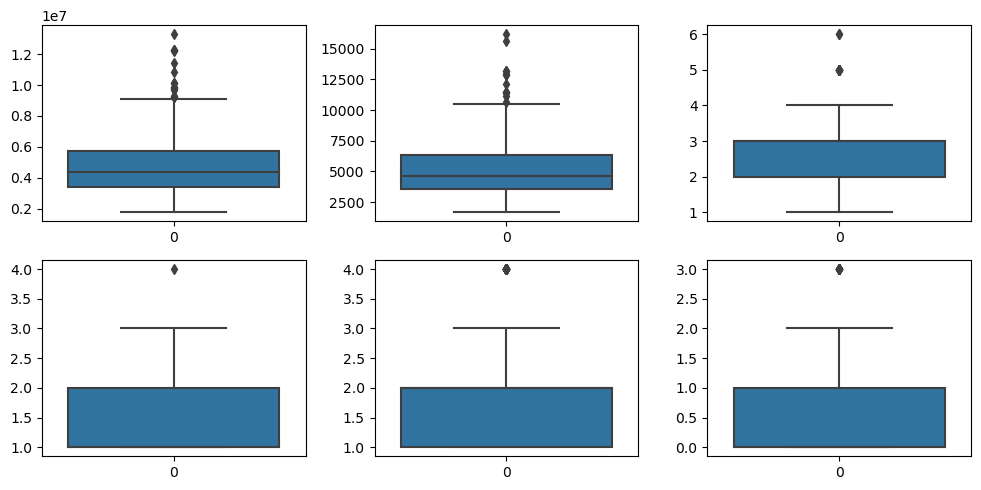

In [13]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(house['price'], ax = axs[0,0])
plt2 = sns.boxplot(house['area'], ax = axs[0,1])
plt3 = sns.boxplot(house['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(house['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(house['stories'], ax = axs[1,1])
plt3 = sns.boxplot(house['parking'], ax = axs[1,2])

plt.tight_layout()

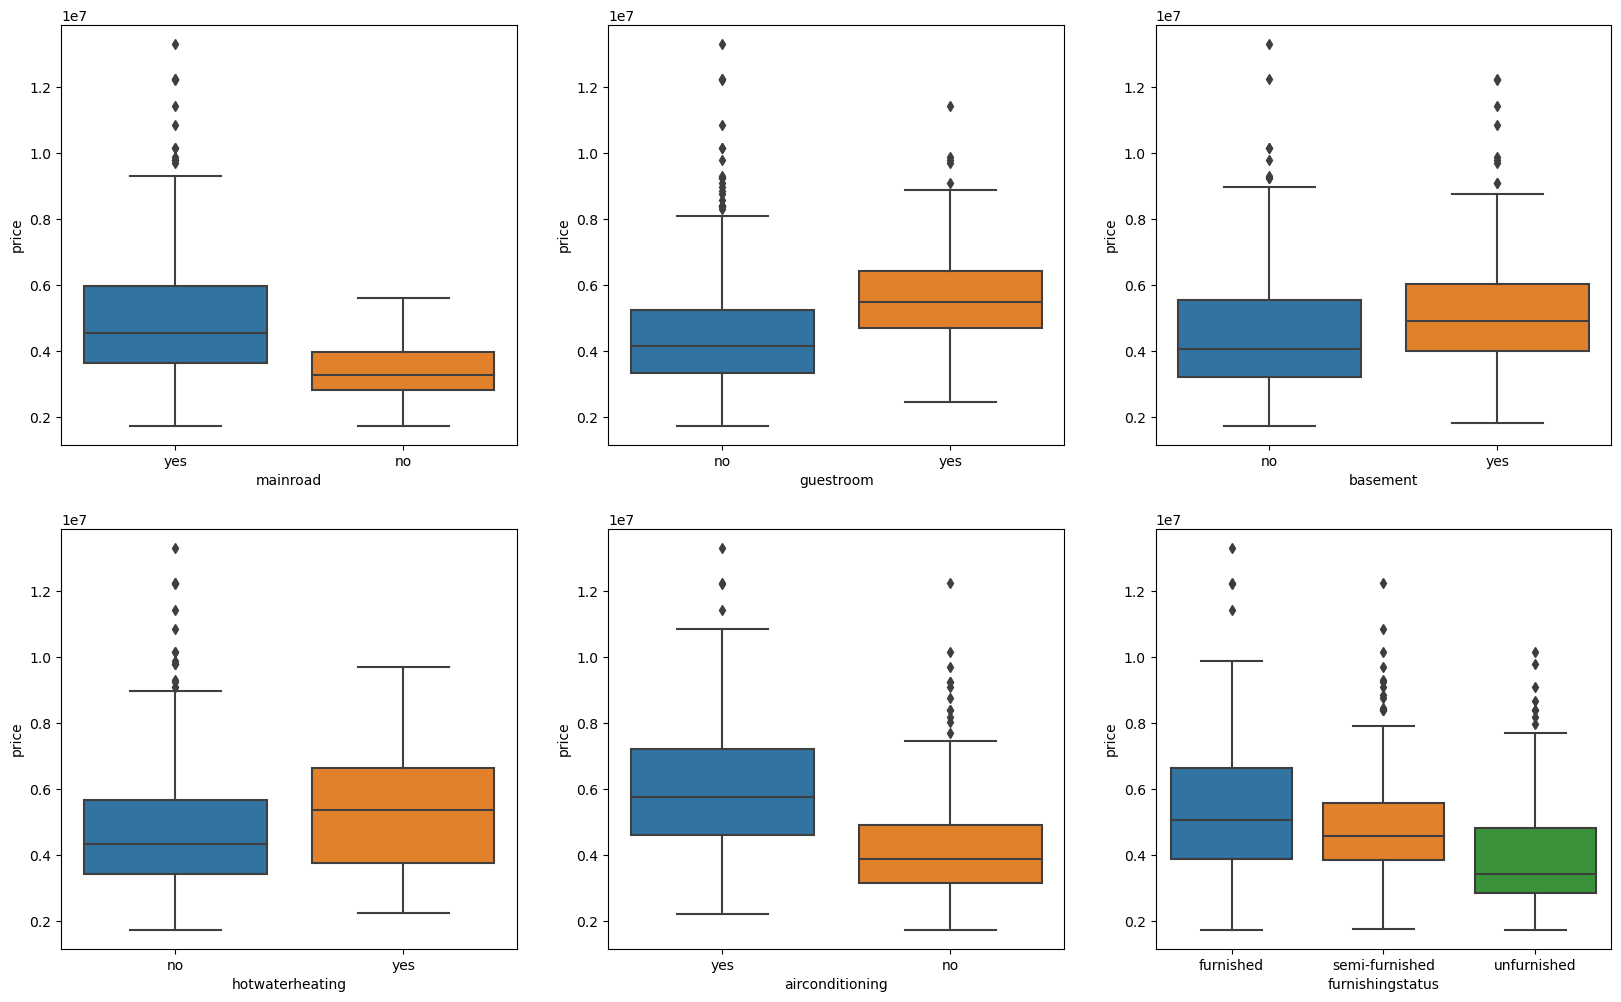

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = house)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = house)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = house)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = house)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = house)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = house)
plt.show()

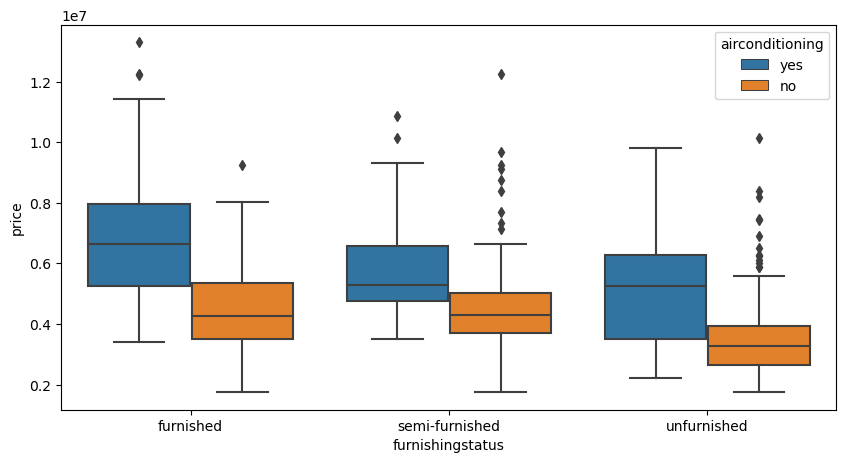

In [15]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = house)
plt.show()

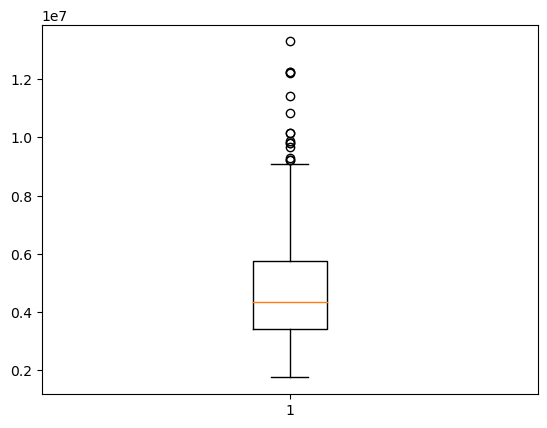

In [16]:
plt.boxplot(house.price)
Q1 = house.price.quantile(0.25)
Q3 = house.price.quantile(0.75)
IQR = Q3 - Q1
house = house[(house.price >= Q1 - 1.5*IQR) & (house.price <= Q3 + 1.5*IQR)]

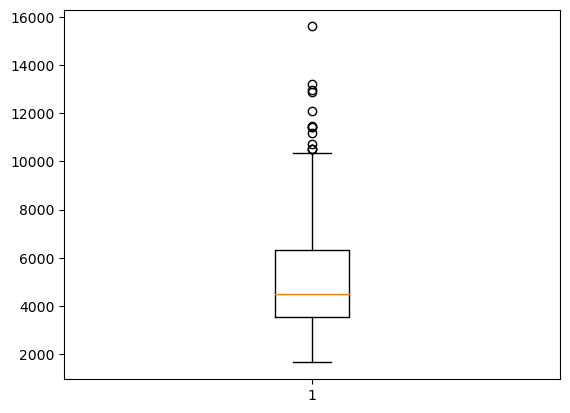

In [17]:
plt.boxplot(house.area)
Q1 = house.area.quantile(0.25)
Q3 = house.area.quantile(0.75)
IQR = Q3 - Q1
house = house[(house.area >= Q1 - 1.5*IQR) & (house.area <= Q3 + 1.5*IQR)]

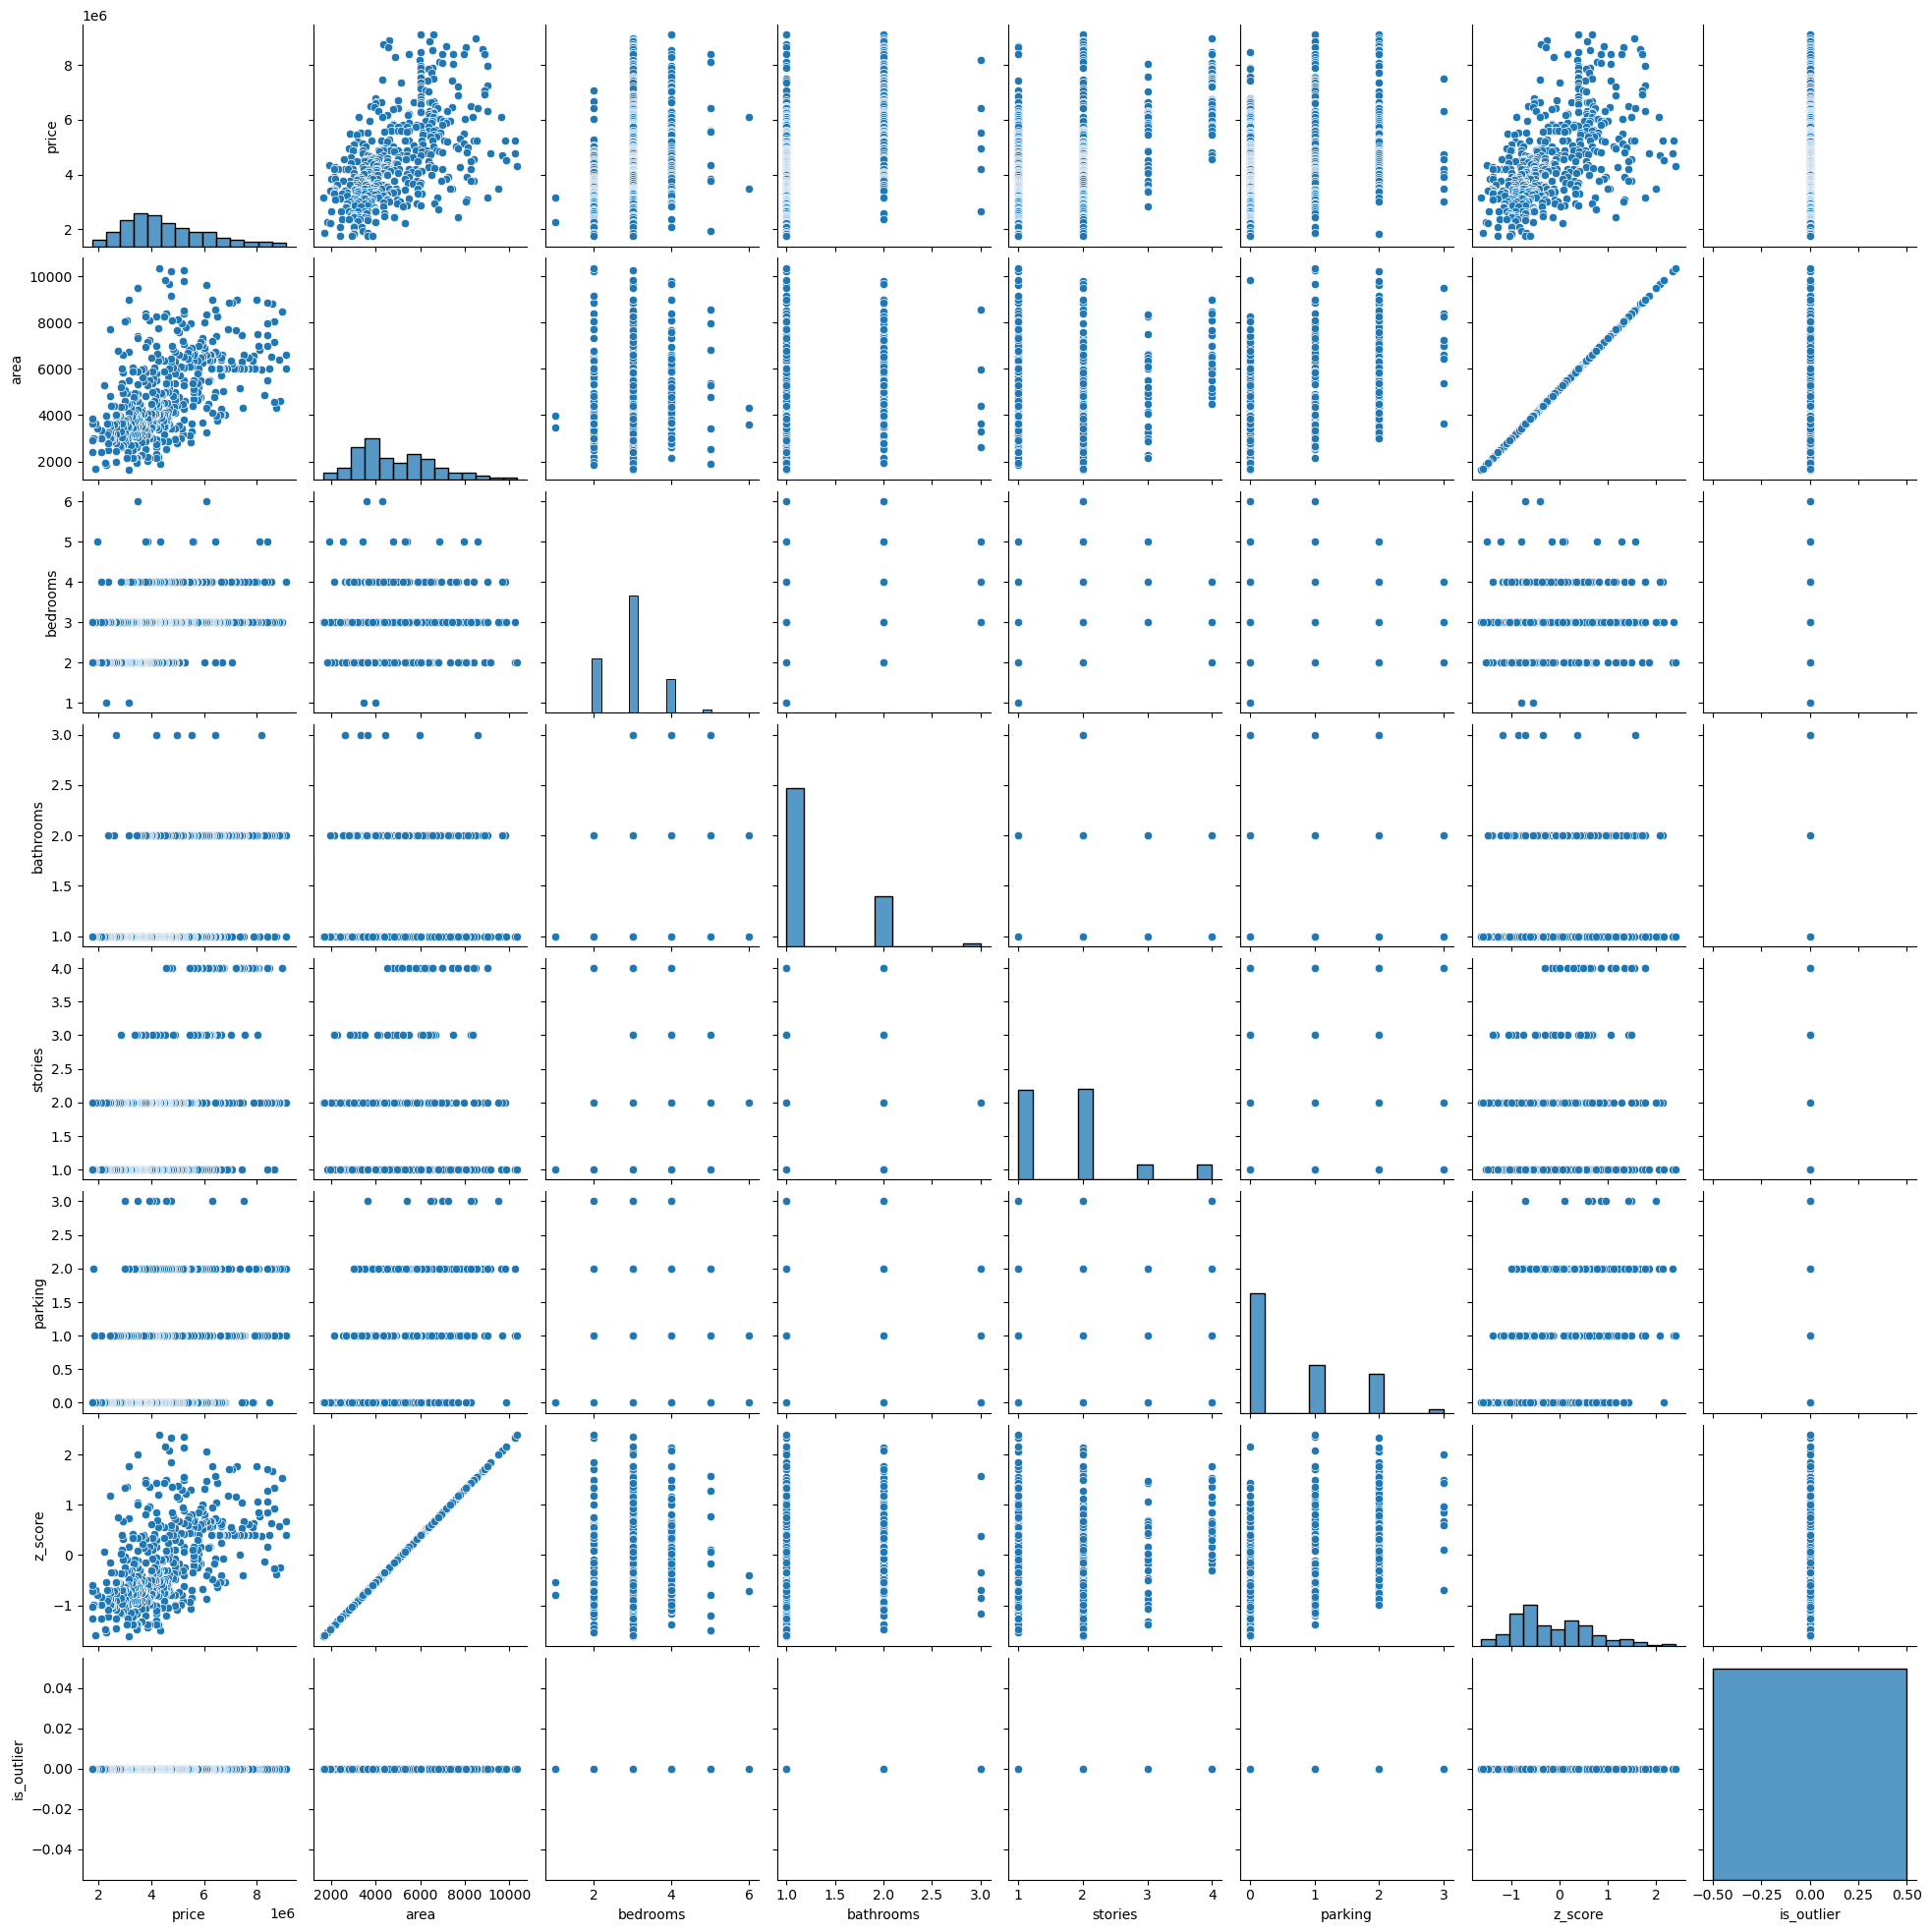

In [18]:
sns.pairplot(house)
plt.show()

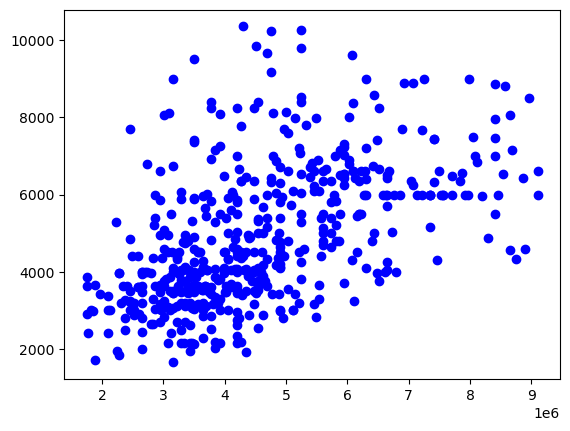

In [19]:
plt.plot(house['price'], house['area'], linestyle='none', marker='o', color='b')
plt.show()

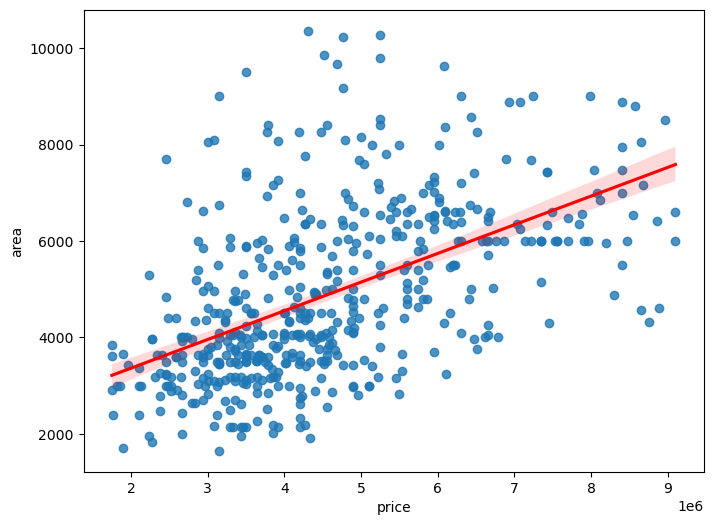

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=house["price"],
    y=house["area"],
    line_kws={"color": "r"},
    ax=ax
)
plt.show()

# Data Preparation: 

### In order to fit a regression line, we need to convert 'YES' and 'NO' to numbers, where 1 is a 'Yes' and 0 is a 'No'.

In [21]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
house[varlist] = house[varlist].apply(binary_map)


In [22]:
house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,z_score,is_outlier
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,0.391430,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0.667910,False
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,1.543429,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,-0.253689,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,0.584966,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,-0.990968,False
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,-1.267448,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,-0.705273,False
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,-1.032440,False


# Dummy Variables:

##### The variable furnishingstatus has three levels. We need to convert these levels into integer. For this, we will use the dummy variables.

In [23]:
status = pd.get_dummies(house['furnishingstatus'])

In [24]:
status

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


#### Droping the furnished column, as the type of furnishing can be identified with just the last two columns where:

- 00 will correspond to furnished
- 01 will correspond to unfurnished
- 10 will correspond to semi-furnished


In [25]:
status = pd.get_dummies(house['furnishingstatus'], drop_first = True)

In [26]:
house = pd.concat([house, status], axis = 1)

In [27]:
house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,z_score,is_outlier,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,0.391430,False,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0.667910,False,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,1.543429,False,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,-0.253689,False,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,0.584966,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,-0.990968,False,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,-1.267448,False,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,-0.705273,False,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,-1.032440,False,0,0


In [28]:
house.drop(['furnishingstatus'], axis = 1, inplace = True)

In [29]:
house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,z_score,is_outlier,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,0.391430,False,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0.667910,False,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,1.543429,False,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,-0.253689,False,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,0.584966,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,-0.990968,False,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,-1.267448,False,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,-0.705273,False,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,-1.032440,False,0,0


# Model Training: 

- Training and Testing the data sets

In [30]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(house, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,z_score,is_outlier,semi-furnished,unfurnished
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,0.557318,False,1,0
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,-1.050872,False,1,0
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,-1.212152,False,0,0
425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,-0.905721,False,0,0
516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,-0.880377,False,0,1


In [35]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,z_score,semi-furnished,unfurnished
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.207756,-0.131608,0.476454,0.304709
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.406264,0.807200,0.500138,0.460923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.495544,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.755961,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.345849,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,0.419078,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.400516,1.000000,1.000000


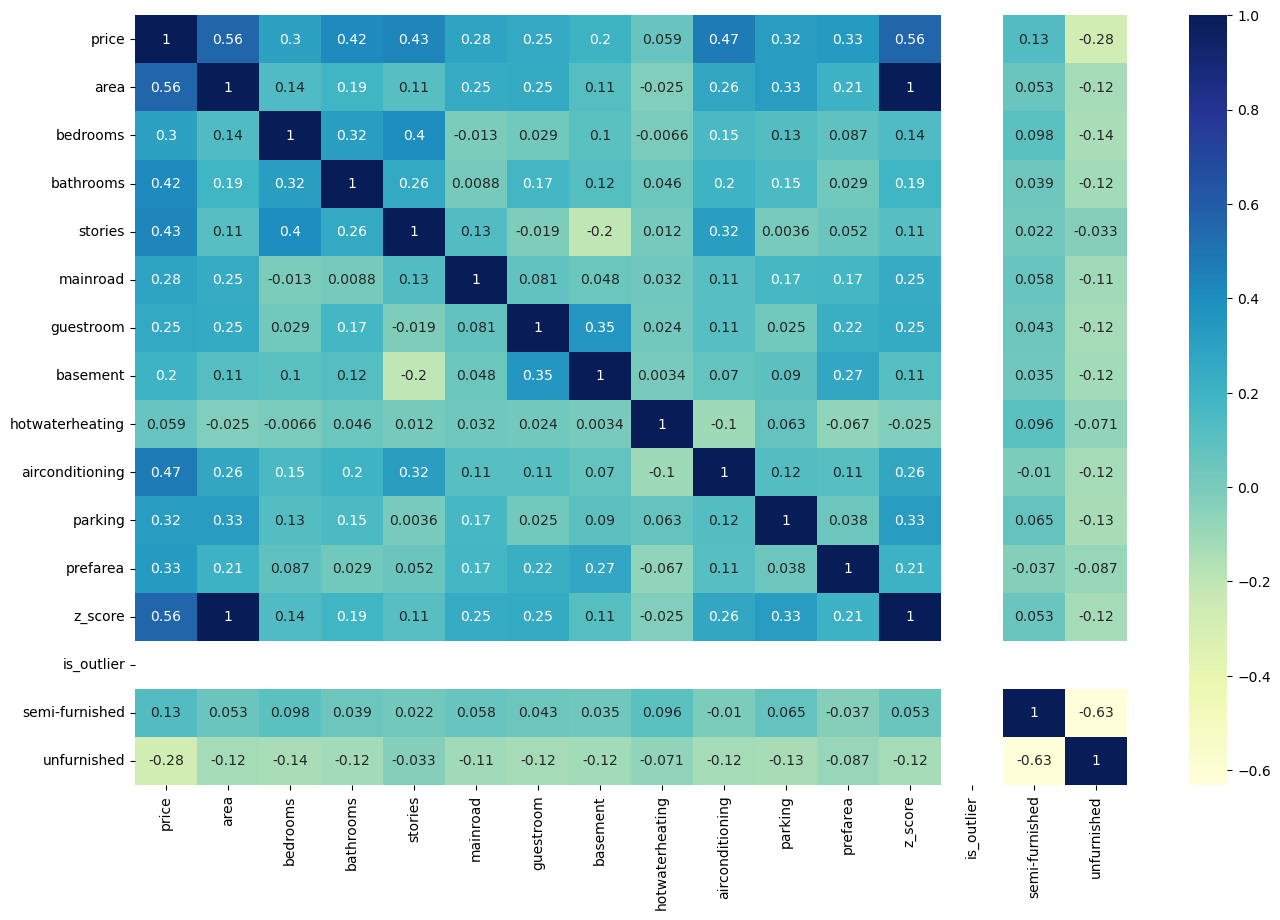

In [36]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [37]:
y_train = df_train.pop('price')
X_train = df_train

# Model Building:
##### Using the LinearRegression function from SciKit Learn for its compatibility with RFE 

- Recursive feature elimination

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [40]:
rfe = RFE(lm)
         
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', False, 5),
 ('bedrooms', False, 7),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 4),
 ('guestroom', False, 6),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('z_score', True, 1),
 ('is_outlier', False, 9),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 2)]

In [42]:
col = X_train.columns[rfe.support_]
col

Index(['bathrooms', 'stories', 'hotwaterheating', 'airconditioning', 'parking',
       'prefarea', 'z_score'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['area', 'bedrooms', 'mainroad', 'guestroom', 'basement', 'is_outlier',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [44]:
X_train_rfe = X_train[col]

In [45]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [46]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [47]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     81.72
Date:                Fri, 10 May 2024   Prob (F-statistic):           5.53e-70
Time:                        12:28:48   Log-Likelihood:                 226.04
No. Observations:                 361   AIC:                            -436.1
Df Residuals:                     353   BIC:                            -405.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2409      0.013     

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,3.33
7,z_score,1.24
4,airconditioning,1.22
2,stories,1.17
5,parking,1.14
1,bathrooms,1.13
6,prefarea,1.05
3,hotwaterheating,1.03


# Residual Analysis of the train data:

In [50]:
y_train_price = lm.predict(X_train_rfe)

In [51]:
res = (y_train_price - y_train)

Text(0.5, 0, 'Errors')

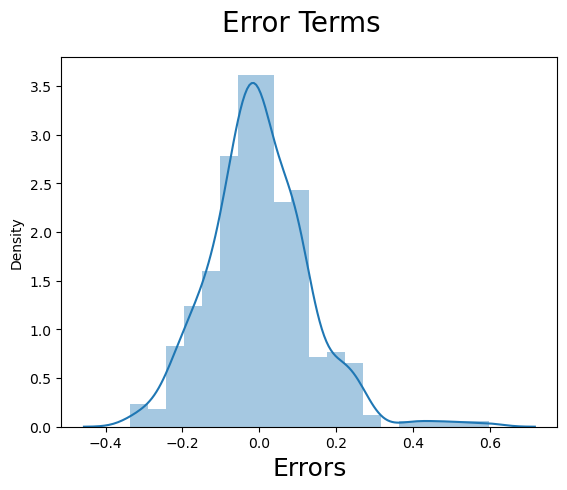

In [52]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

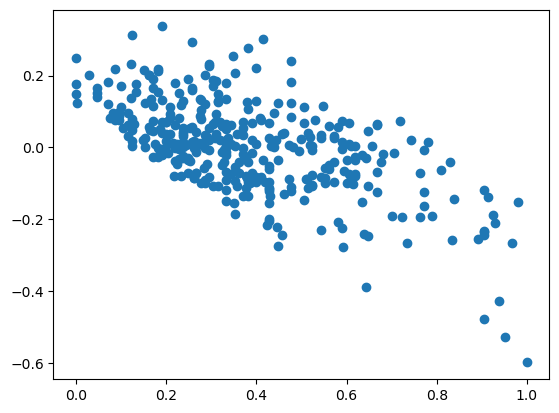

In [53]:
plt.scatter(y_train,res)
plt.show()

# Model Evaluation:
- Applying the scaling on the test sets

In [54]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [55]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [56]:
y_test = df_test.pop('price')
X_test = df_test

In [57]:
X_test = sm.add_constant(X_test)

In [58]:
X_test_rfe = X_test[X_train_rfe.columns]

In [59]:
y_pred = lm.predict(X_test_rfe)

In [60]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.5935708475461554

Text(0, 0.5, 'y_pred')

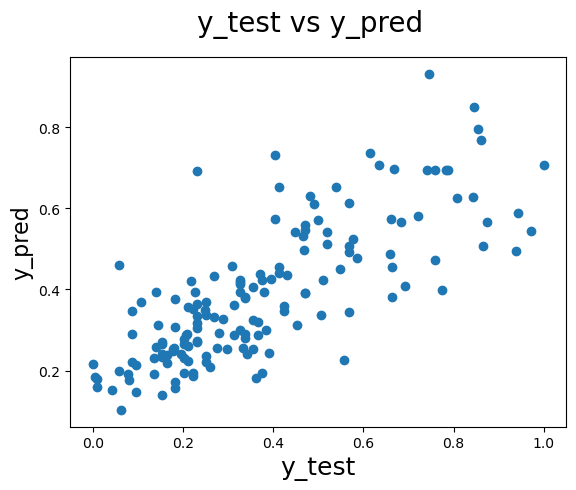

In [61]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   